<a href="https://colab.research.google.com/github/othmanebenlamlih/PFE/blob/main/Denoising_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = 'https://drive.google.com/drive/u/1/folders/1NeBt9WYhPbTaHSIqTEsD_GRLIfBAhXKB'

In [3]:
pip install pydicom

     |████████████████████████████████| 1.9MB 5.1MB/s 


# MRI denoising 
The 3 top denoising algorithms for MRI denoising are 
# NLM, Bilateral, block-match and 3D filtering (BM3D)

In [4]:
import matplotlib.pyplot as plt
import pydicom

load dataset

In [5]:
dataset = pydicom.dcmread("/content/drive/MyDrive/MASTER/PFE/data/CT_small.dcm")

In [6]:
dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20040119'
(0008, 0013) Instance Creation Time              TM: '072731'
(0008, 0014) Instance Creator UID                U

In [7]:
img=dataset.pixel_array

In [8]:
img

array([[175, 180, 166, ..., 203, 207, 216],
       [186, 183, 157, ..., 181, 190, 239],
       [184, 180, 171, ..., 152, 164, 235],
       ...,
       [906, 910, 923, ..., 922, 929, 927],
       [914, 954, 938, ..., 942, 925, 905],
       [959, 955, 916, ..., 911, 904, 909]], dtype=int16)

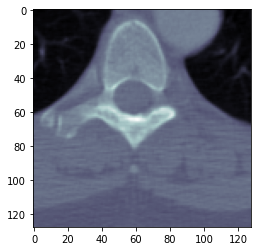

In [9]:
plt.imshow(img, cmap=plt.cm.bone)

In [10]:
plt.imsave("/content/drive/MyDrive/MASTER/PFE/data/dcm_to_tiff_converted.jpg", img, cmap='gray')

#Denoising filters


##Gaussian

In [11]:
from skimage import img_as_float

from skimage.metrics import peak_signal_noise_ratio#im importing peak_signal_noise_ratio that is in skimage.metric and im gonna use this to report the between my noisy image and the cleaned image 


from matplotlib import pyplot as plt
from skimage import io
from scipy import ndimage as nd  #now im gone to use gaussian filter that's part of scifi package


In [12]:
noisy_img = img_as_float(io.imread("/content/drive/MyDrive/MASTER/PFE/data/MRI_noisy.tif"))
#Need to convert to float as we will be doing math on the array
#Also, most skimage functions need float numbers
#load the image
ref_img = img_as_float(io.imread("/content/drive/MyDrive/MASTER/PFE/data/MRI_clean.tif"))

apply Gaussian the filter

In [13]:
gaussian_img5 = nd.gaussian_filter(noisy_img, sigma=5) 
gaussian_img3 = nd.gaussian_filter(noisy_img, sigma=3)
gaussian_img10 = nd.gaussian_filter(noisy_img, sigma=10)
#sigma :: the higher the sigma the better the denoising is going to be more blurry the image actually 
plt.imsave("/content/drive/MyDrive/MASTER/PFE/data/Gaussian_smoothed.jpg", gaussian_img5, cmap='gray')
#save the image


In [14]:
from scipy.ndimage import gaussian_filter
test =gaussian_filter(noisy_img, sigma=5)



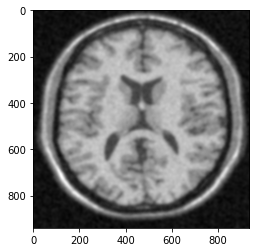

In [15]:
plt.imshow(test, cmap='gray')

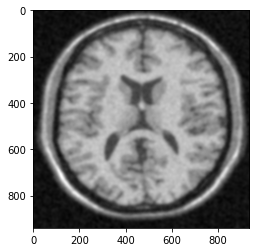

In [16]:
plt.imshow(gaussian_img5, cmap='gray')


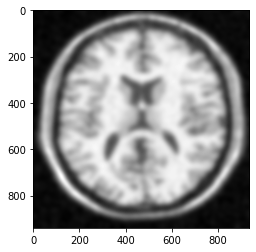

In [17]:
plt.imshow(gaussian_img10, cmap='gray')

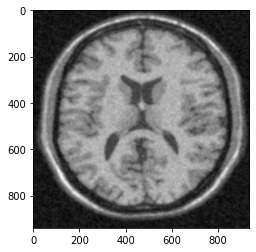

In [18]:
plt.imshow(gaussian_img3, cmap='gray')

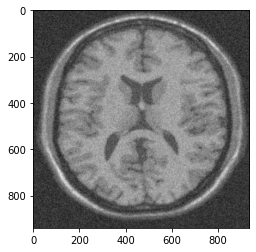

In [19]:
plt.imshow(noisy_img, cmap='gray')

ok now let compare a perfect image with a noise and guessing image

In [20]:
test= img_as_float(io.imread("/content/drive/MyDrive/MASTER/PFE/data/image1434.jpg"))

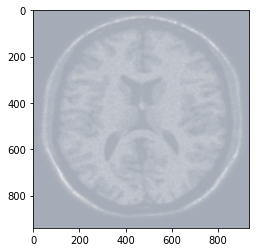

In [21]:
plt.imshow(test, cmap='gray')

In [22]:

#compare the image
noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
gaussian_cleaned_psnr5 = peak_signal_noise_ratio(ref_img, gaussian_img5)
gaussian_cleaned_psnr10 = peak_signal_noise_ratio(ref_img, gaussian_img10)
gaussian_cleaned_psnr3 = peak_signal_noise_ratio(ref_img, gaussian_img3)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image with segma5 = ", gaussian_cleaned_psnr5)
print("PSNR of cleaned image with segma10 = ", gaussian_cleaned_psnr10)
print("PSNR of cleaned image with segma3 = ", gaussian_cleaned_psnr3)

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image with segma5 =  17.112001291081445
PSNR of cleaned image with segma10 =  16.519389068739873
PSNR of cleaned image with segma3 =  17.268761790926092


In [23]:
ref_img.shape

(940, 934)

In [24]:
test.shape

(940, 934, 3)

so the most perfect gaussian segmentation that we have is with sigma 3

## Bilateral

In [25]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,denoise_wavelet, estimate_sigma)

In [26]:
denoise_bilateral10 = denoise_bilateral(noisy_img, sigma_spatial=10,
                multichannel=False)#multichannel = black and white or rgb

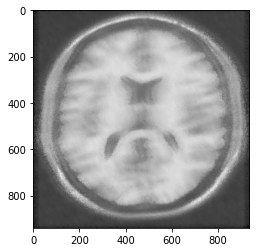

In [27]:
plt.imshow(denoise_bilateral10, cmap='gray')

In [28]:
denoise_bilateral5= denoise_bilateral(noisy_img, sigma_spatial=5,
                multichannel=False)#multichannel = black and white or rgb

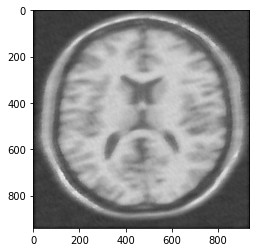

In [29]:
plt.imshow(denoise_bilateral5, cmap='gray')

In [30]:
denoise_bilateral2= denoise_bilateral(noisy_img, sigma_spatial=2,
                multichannel=False)#multichannel = black and white or rgb

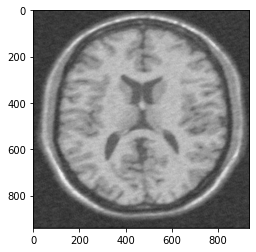

In [31]:
plt.imshow(denoise_bilateral2, cmap='gray')

In [32]:
bilateral_cleaned_psnr10 = peak_signal_noise_ratio(ref_img, denoise_bilateral10)
bilateral_cleaned_psnr5 = peak_signal_noise_ratio(ref_img, denoise_bilateral5)
bilateral_cleaned_psnr2 = peak_signal_noise_ratio(ref_img, denoise_bilateral2)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image with segma3 = ", gaussian_cleaned_psnr10)
print("PSNR of cleaned image with bilateral10= ", bilateral_cleaned_psnr10)
print("PSNR of cleaned image with bilateral5= ", bilateral_cleaned_psnr5)
print("PSNR of cleaned image with bilateral2= ", bilateral_cleaned_psnr2)

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image with segma3 =  16.519389068739873
PSNR of cleaned image with bilateral10=  16.588109539362343
PSNR of cleaned image with bilateral5=  17.036136832503225
PSNR of cleaned image with bilateral2=  17.262526012789476


we can observe that the most perfect sigma that can we aplay in Bilateral function is 2

In [33]:
plt.imsave("/content/drive/MyDrive/MASTER/PFE/data/TV_smoothed.jpg", denoise_bilateral2, cmap='gray')

## TV Total variatient

In [34]:
denoise_TV3 = denoise_tv_chambolle(noisy_img, weight=0.3, multichannel=False)
denoise_TV1 = denoise_tv_chambolle(noisy_img, weight=0.1, multichannel=False)
denoise_TV5 = denoise_tv_chambolle(noisy_img, weight=0.5, multichannel=False)



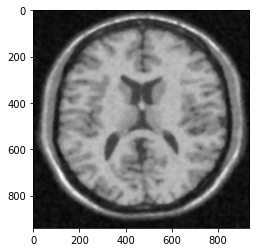

In [35]:
plt.imshow(denoise_TV3, cmap='gray')

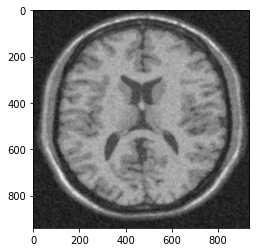

In [36]:
plt.imshow(denoise_TV1, cmap='gray')

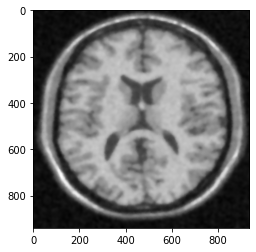

In [37]:
plt.imshow(denoise_TV5, cmap='gray')

In [38]:
TV_cleaned_psnr3 = peak_signal_noise_ratio(ref_img, denoise_TV3)
TV_cleaned_psnr1 = peak_signal_noise_ratio(ref_img, denoise_TV1)
TV_cleaned_psnr5 = peak_signal_noise_ratio(ref_img, denoise_TV5)

print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image with segma3 = ", gaussian_cleaned_psnr10)
print("PSNR of cleaned image with bilateral3= ", bilateral_cleaned_psnr10)
print("------------")
print("PSNR of cleaned image with TV3= ", TV_cleaned_psnr3)
print("PSNR of cleaned image with TV1= ", TV_cleaned_psnr1)
print("PSNR of cleaned image with TV5= ", TV_cleaned_psnr5)



PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image with segma3 =  16.519389068739873
PSNR of cleaned image with bilateral3=  16.588109539362343
------------
PSNR of cleaned image with TV3=  17.19161931394431
PSNR of cleaned image with TV1=  17.29344505506783
PSNR of cleaned image with TV5=  17.105390486211014


sow we can see that tv cleaner with 0.1 segma had higher result than any clener before

In [39]:
plt.imsave("/content/drive/MyDrive/MASTER/PFE/data/TV_smoothed.jpg", denoise_TV1, cmap='gray')

## Wavelet 

we illustrate two different methods for wavelet coefficient threshold selection: BayesShrink and VisuShrink.

> VisuShrink

The VisuShrink approach employs a single, universal threshold to all wavelet detail coefficients. This threshold is designed to remove additive Gaussian noise with high probability, which tends to result in overly smooth image appearance. By specifying a sigma that is smaller than the true noise standard deviation, a more visually agreeable result can be obtained.



> BayesShrink

The BayesShrink algorithm is an adaptive approach to wavelet soft thresholding where a unique threshold is estimated for each wavelet subband. This generally results in an improvement over what can be obtained with a single threshold.



In [40]:
wavelet_BayesShrink = denoise_wavelet(noisy_img, multichannel=False,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)

In [41]:
wavelet_BayesShrink_psnr = peak_signal_noise_ratio(ref_img, wavelet_BayesShrink)

In [42]:
wavelet_VisuShrink = denoise_wavelet(noisy_img, multichannel=False,
                           method='VisuShrink', mode='soft',
                           rescale_sigma=True)

In [43]:
wavelet_VisuShrink_psnr = peak_signal_noise_ratio(ref_img, wavelet_VisuShrink)

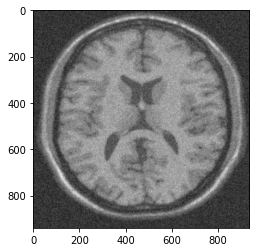

In [44]:
plt.imshow(wavelet_BayesShrink, cmap='gray')

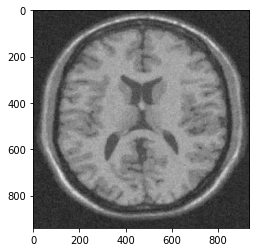

In [45]:
plt.imshow(wavelet_VisuShrink, cmap='gray')

In [46]:
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image with segma3 = ", gaussian_cleaned_psnr10)
print("PSNR of cleaned image with bilateral3= ", bilateral_cleaned_psnr10)
print("PSNR of cleaned image with TV1= ", TV_cleaned_psnr3)
print('-----------------------')
print("PSNR of cleaned image with wavelet_BayesShrink= ", wavelet_BayesShrink_psnr)
print("PSNR of cleaned image with wavelet_VisuShrink= ", wavelet_VisuShrink_psnr)

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image with segma3 =  16.519389068739873
PSNR of cleaned image with bilateral3=  16.588109539362343
PSNR of cleaned image with TV1=  17.19161931394431
-----------------------
PSNR of cleaned image with wavelet_BayesShrink=  17.0525032515753
PSNR of cleaned image with wavelet_VisuShrink=  17.171547077358


we can say that we didn't have much of improve between wavelet cleaned and the previous filter

In [47]:
plt.imsave("/content/drive/MyDrive/MASTER/PFE/data/wavelet_VisuShrink.jpg", denoise_TV1, cmap='gray')

sow now see more promossing filters 

## Anisotropic Diffusion

In [48]:
pip install medpy

     |████████████████████████████████| 153kB 6.8MB/s 
     |████████████████████████████████| 47.4MB 64kB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754479 sha256=9fee880f7bcead45d248f46bc5a56cf094da61f012b32cf6e78e03c1eeb17ba3
  Stored in directory: /root/.cache/pip/wheels/8c/c9/9c/2c6281c7a72b9fb1570862a4f028af7ce38405008354fbf870
Successfully built medpy


In [49]:
from medpy.filter.smoothing import anisotropic_diffusion

In [50]:
# niter= number of iterations
#kappa = Conduction coefficient (20 to 100)
#gamma = speed of diffusion (<=0.25)
#Option: Perona Malik equation 1 or 2. A value of 3 is for Turkey's biweight function 
img_aniso_filtered = anisotropic_diffusion(noisy_img, niter=50, kappa=150, gamma=0.2, option=2) 

/usr/local/lib/python3.7/dist-packages/medpy/filter/smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/usr/local/lib/python3.7/dist-packages/medpy/filter/smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


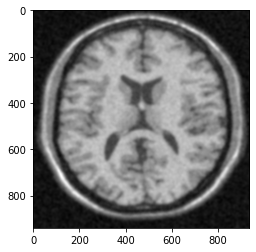

In [51]:
plt.imshow(img_aniso_filtered, cmap='gray')

In [52]:
anisotropic_cleaned_psnr = peak_signal_noise_ratio(ref_img, img_aniso_filtered)

print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image with segma3 = ", gaussian_cleaned_psnr10)
print("PSNR of cleaned image with bilateral3= ", bilateral_cleaned_psnr10)
print("PSNR of cleaned image with TV1= ", TV_cleaned_psnr3)
print("PSNR of cleaned image with wavelet_BayesShrink= ", wavelet_BayesShrink_psnr)
print("PSNR of cleaned image with wavelet_VisuShrink= ", wavelet_VisuShrink_psnr)
print("PSNR of cleaned image with Anisotropic Diffusion= ", anisotropic_cleaned_psnr)

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image with segma3 =  16.519389068739873
PSNR of cleaned image with bilateral3=  16.588109539362343
PSNR of cleaned image with TV1=  17.19161931394431
PSNR of cleaned image with wavelet_BayesShrink=  17.0525032515753
PSNR of cleaned image with wavelet_VisuShrink=  17.171547077358
PSNR of cleaned image with Anisotropic Diffusion=  17.163162080599715


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  """Entry point for launching an IPython kernel.


In [53]:
plt.imsave("/content/drive/MyDrive/MASTER/PFE/data/anisotropic_denoised.jpg", img_aniso_filtered, cmap='gray')

## NLM from SKIMAGE

In [54]:
from skimage.restoration import denoise_nl_means, estimate_sigma
import numpy as np

sigma_est = np.mean(estimate_sigma(noisy_img, multichannel=False))
NLM_skimg_denoise_img = denoise_nl_means(noisy_img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=9, patch_distance=5, multichannel=False)


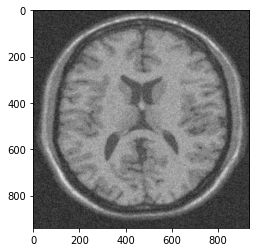

In [55]:
plt.imshow(NLM_skimg_denoise_img, cmap='gray')

In [56]:
NLM_skimg_cleaned_psnr = peak_signal_noise_ratio(ref_img, NLM_skimg_denoise_img)

print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image with segma3 = ", gaussian_cleaned_psnr10)
print("PSNR of cleaned image with bilateral3= ", bilateral_cleaned_psnr10)
print("PSNR of cleaned image with TV1= ", TV_cleaned_psnr3)
print("PSNR of cleaned image with wavelet_BayesShrink= ", wavelet_BayesShrink_psnr)
print("PSNR of cleaned image with wavelet_VisuShrink= ", wavelet_VisuShrink_psnr)
print("PSNR of cleaned image with Anisotropic Diffusion= ", anisotropic_cleaned_psnr)
print("PSNR of cleaned image with NLM skimg cleaned= ", NLM_skimg_cleaned_psnr)

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image with segma3 =  16.519389068739873
PSNR of cleaned image with bilateral3=  16.588109539362343
PSNR of cleaned image with TV1=  17.19161931394431
PSNR of cleaned image with wavelet_BayesShrink=  17.0525032515753
PSNR of cleaned image with wavelet_VisuShrink=  17.171547077358
PSNR of cleaned image with Anisotropic Diffusion=  17.163162080599715
PSNR of cleaned image with NLM skimg cleaned=  17.03790009274298


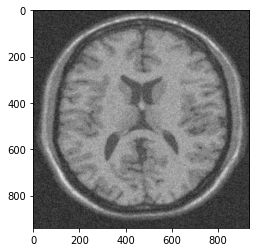

In [57]:
plt.imshow(NLM_skimg_denoise_img, cmap='gray')

In [58]:
plt.imsave("/content/drive/MyDrive/MASTER/PFE/data/NLM_skimage_denoised.jpg", NLM_skimg_denoise_img, cmap='gray')

##BM3D Block-matching and 3D filtering

In [59]:
#pip install bm3d

In [61]:
pip install bm3d

     |████████████████████████████████| 8.4MB 4.7MB/s 


In [62]:
import bm3d
BM3D_denoised_image = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.ALL_STAGES)

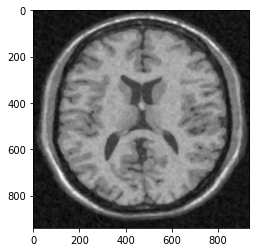

In [63]:
plt.imshow(BM3D_denoised_image, cmap='gray')

In [66]:
BM3D_cleaned_psnr = peak_signal_noise_ratio(ref_img, BM3D_denoised_image)

print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image with segma3 = ", gaussian_cleaned_psnr10)
print("PSNR of cleaned image with bilateral3= ", bilateral_cleaned_psnr10)
print("PSNR of cleaned image with TV1= ", TV_cleaned_psnr3)
print("PSNR of cleaned image with wavelet_BayesShrink= ", wavelet_BayesShrink_psnr)
print("PSNR of cleaned image with wavelet_VisuShrink= ", wavelet_VisuShrink_psnr)
print("PSNR of cleaned image with Anisotropic Diffusion= ", anisotropic_cleaned_psnr)
print("PSNR of cleaned image with NLM skimg cleaned= ", NLM_skimg_cleaned_psnr)       
print("PSNR of cleaned image with NLM BM3D= ", BM3D_cleaned_psnr)                                      

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image with segma3 =  16.519389068739873
PSNR of cleaned image with bilateral3=  16.588109539362343
PSNR of cleaned image with TV1=  17.19161931394431
PSNR of cleaned image with wavelet_BayesShrink=  17.0525032515753
PSNR of cleaned image with wavelet_VisuShrink=  17.171547077358
PSNR of cleaned image with Anisotropic Diffusion=  17.163162080599715
PSNR of cleaned image with NLM skimg cleaned=  17.03790009274298
PSNR of cleaned image with NLM BM3D=  17.371958614894616


sow here we find the most perfect filter in our case


In [67]:
plt.imsave("/content/drive/MyDrive/MASTER/PFE/data/BM3D_denoised_image.jpg", BM3D_denoised_image, cmap='gray')

# benchmarking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


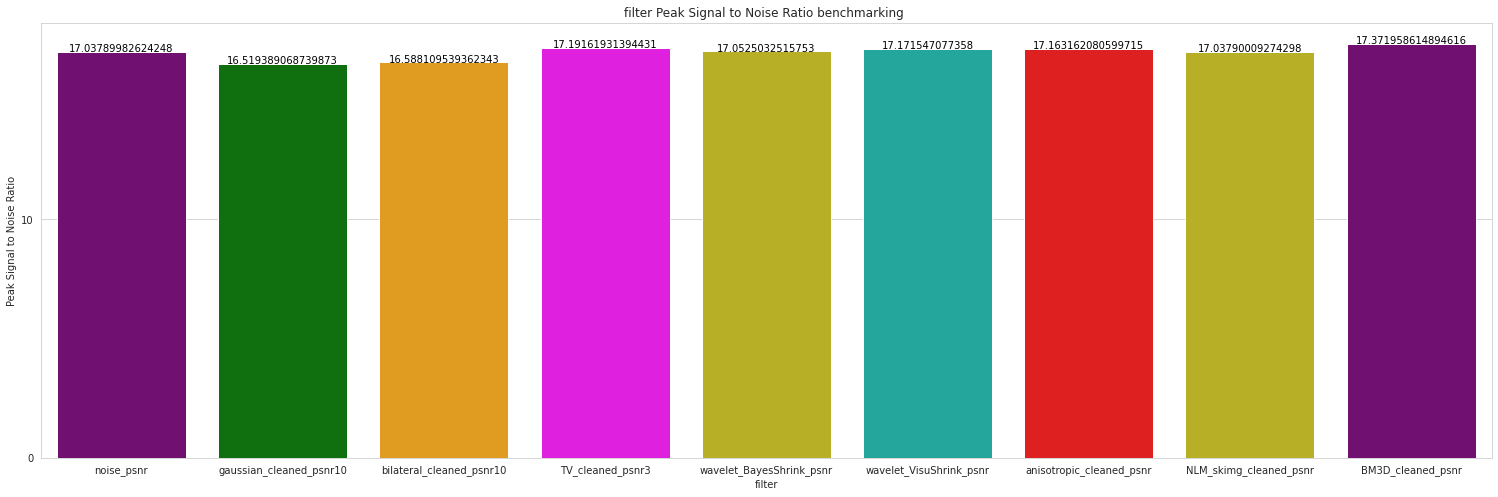

In [70]:
import seaborn as sns
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","red","#CFC60E"]
X=['noise_psnr' ,'gaussian_cleaned_psnr10','bilateral_cleaned_psnr10','TV_cleaned_psnr3','wavelet_BayesShrink_psnr','wavelet_VisuShrink_psnr','anisotropic_cleaned_psnr','NLM_skimg_cleaned_psnr','BM3D_cleaned_psnr']
Y=[noise_psnr,gaussian_cleaned_psnr10,bilateral_cleaned_psnr10,TV_cleaned_psnr3,wavelet_BayesShrink_psnr,wavelet_VisuShrink_psnr,anisotropic_cleaned_psnr,NLM_skimg_cleaned_psnr,BM3D_cleaned_psnr]
sns.set_style("whitegrid")
plt.figure(figsize=(26,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Peak Signal to Noise Ratio")
plt.xlabel("filter")
plt.title("filter Peak Signal to Noise Ratio benchmarking ")
g=sns.barplot(X, Y, palette=colors)
for i in range(len(Y)):
    g.text(i, Y[i],Y[i],color='black', ha="center")
plt.show()